In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm,metrics,neighbors,tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

In [ ]:
df = pd.read_excel("winequality-red.xls")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df.set_index(["chlorides","quality"]).count(level="quality")

,fixed acidity,volatile acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18


In [ ]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values
X[:5]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00],
       [1.120e+01, 2.800e-01, 5.600e-01, 1.900e+00, 7.500e-02, 1.700e+01,
        6.000e+01, 9.980e-01, 3.160e+00, 5.800e-01, 9.800e+00],
       [7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00]])

In [ ]:
y = df['quality'].values

for i in range(0,len(y)):
    y[i] = y[i] - 3
    
        
y[:5]

array([2, 2, 2, 3, 2])

In [ ]:
X = preprocessing.MinMaxScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , 0.11643836, 0.14357262,
        0.33802817, 0.2155477 , 0.49412628, 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , 0.09589041, 0.13355593,
        0.1971831 , 0.16961131, 0.50881057, 0.40944882, 0.19161677,
        0.21538462],
       [0.5840708 , 0.10958904, 0.56      , 0.06849315, 0.10517529,
        0.22535211, 0.19081272, 0.58223201, 0.33070866, 0.1497006 ,
        0.21538462],
       [0.24778761, 0.39726027, 0.        , 0.06849315, 0.10684474,
        0.14084507, 0.09893993, 0.56754772, 0.60629921, 0.13772455,
        0.15384615]])

# Univariate feature selection (chi-squared test)

In [ ]:
X = pd.DataFrame(X)
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(7,'Score'))  

    Specs      Score
10     10  36.803074
1       1  13.811468
2       2  13.025665
6       6  11.180614
9       9   5.474665
7       7   2.525748
5       5   2.434120


# Feature Importance using Tree based Classifier

[0.07892919 0.09616056 0.081289   0.0785168  0.07559496 0.07376238
 0.10290111 0.08499912 0.07645718 0.1048965  0.1464932 ]


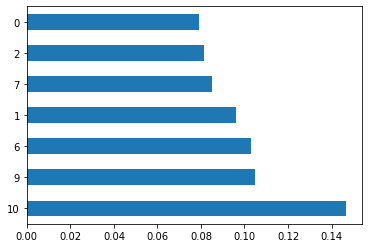

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [ ]:
X = df[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']].values
X = preprocessing.MinMaxScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[0.39726027, 0.        , 0.09893993, 0.13772455, 0.15384615],
       [0.52054795, 0.        , 0.2155477 , 0.20958084, 0.21538462],
       [0.43835616, 0.04      , 0.16961131, 0.19161677, 0.21538462],
       [0.10958904, 0.56      , 0.19081272, 0.1497006 , 0.21538462],
       [0.39726027, 0.        , 0.09893993, 0.13772455, 0.15384615]])

# Stratified Folds

In [ ]:
skf = StratifiedKFold(n_splits=3)
skf.get_n_splits(X, y)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

# Normal Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

# KNN 

In [ ]:
clf = neighbors.KNeighborsClassifier()
para_grid = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,15,20],'weights':['uniform','distance']}
clf_g = GridSearchCV(clf,para_grid,cv=5)
clf_g.fit(X_train,y_train)
print(clf_g.best_params_)
pred = clf_g.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred, normalize = True))
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

{'n_neighbors': 20, 'weights': 'distance'}
Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.12      0.22         8
           2       0.72      0.84      0.77        99
           3       0.73      0.71      0.72       104
           4       0.65      0.48      0.55        27
           5       1.00      1.00      1.00         1

    accuracy                           0.72       240
   macro avg       0.68      0.53      0.54       240
weighted avg       0.72      0.72      0.70       240

	Confusion Matrix
[[ 0  0  1  0  0  0]
 [ 0  1  6  1  0  0]
 [ 0  0 83 15  1  0]
 [ 0  0 24 74  6  0]
 [ 0  0  2 12 13  0]
 [ 0  0  0  0  0  1]]


/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM

In [ ]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred, normalize = True))
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

Accuracy: 0.6458333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         8
           2       0.66      0.81      0.72        99
           3       0.64      0.65      0.64       104
           4       0.64      0.26      0.37        27
           5       0.00      0.00      0.00         1

    accuracy                           0.65       240
   macro avg       0.32      0.29      0.29       240
weighted avg       0.62      0.65      0.62       240

	Confusion Matrix
[[ 0  0  1  0  0  0]
 [ 0  0  7  1  0  0]
 [ 0  0 80 19  0  0]
 [ 0  0 32 68  4  0]
 [ 0  0  2 18  7  0]
 [ 0  0  0  1  0  0]]


/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DECISION TREE

In [ ]:
clf = Pipeline([('clf', DecisionTreeClassifier(random_state=101))])  

criterion = ['gini', 'entropy']
splitter = ['best']
max_depth = [8, 9, 10, 11] 
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None] 

param_grid = [{ 'clf__class_weight': class_weight
                ,'clf__criterion': criterion
                ,'clf__splitter': splitter
                ,'clf__max_depth': max_depth
                ,'clf__min_samples_leaf': min_samples_leaf
            }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

gs.fit(X_train,y_train)

pred = gs.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred, normalize = True))
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.6583333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.20      0.12      0.15         8
           2       0.67      0.81      0.73        99
           3       0.68      0.63      0.66       104
           4       0.61      0.41      0.49        27
           5       0.00      0.00      0.00         1

    accuracy                           0.66       240
   macro avg       0.36      0.33      0.34       240
weighted avg       0.65      0.66      0.65       240

	Confusion Matrix
[[ 0  0  1  0  0  0]
 [ 0  1  7  0  0  0]
 [ 0  0 80 18  1  0]
 [ 0  4 27 66  6  1]
 [ 0  0  4 12 11  0]
 [ 0  0  0  1  0  0]]


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.6s finished
/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LOGISTIC REGRESSION

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
pred = LR.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred, normalize = True))
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

Accuracy: 0.5208333333333334
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         8
           2       0.51      0.95      0.66        99
           3       0.55      0.30      0.39       104
           4       0.00      0.00      0.00        27
           5       0.00      0.00      0.00         1

    accuracy                           0.52       240
   macro avg       0.18      0.21      0.18       240
weighted avg       0.45      0.52      0.44       240

	Confusion Matrix
[[ 0  0  1  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0 94  5  0  0]
 [ 0  0 73 31  0  0]
 [ 0  0  8 19  0  0]
 [ 0  0  0  1  0  0]]


/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Gradient Boosting

In [ ]:
clf = Pipeline([('clf', GradientBoostingClassifier(random_state=101))])  

learning_rate =  [1e-02] 
n_estimators= [400]
max_depth = [10]
n_comp = [2, 3, 4, 5]

param_grid = [{'clf__learning_rate': learning_rate
                ,'clf__max_depth': max_depth
                ,'clf__n_estimators' : n_estimators 
             }]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs.fit(X_train,y_train)

pred = gs.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred, normalize = True))
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.5s remaining:   33.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   23.0s finished


Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         8
           2       0.70      0.83      0.76        99
           3       0.71      0.70      0.71       104
           4       0.63      0.44      0.52        27
           5       1.00      1.00      1.00         1

    accuracy                           0.70       240
   macro avg       0.51      0.50      0.50       240
weighted avg       0.67      0.70      0.68       240

	Confusion Matrix
[[ 0  0  1  0  0  0]
 [ 0  0  5  3  0  0]
 [ 0  0 82 16  1  0]
 [ 0  0 25 73  6  0]
 [ 0  0  4 11 12  0]
 [ 0  0  0  0  0  1]]


/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [ ]:
clf = Pipeline([('clf', RandomForestClassifier(random_state=101))])  

criterion = ['gini', 'entropy']
class_weight = ['balanced', None] 
n_estimators = [155, 175]  
max_depth  = [20, None] 
min_samples_split = [2, 3, 4]
min_samples_leaf = [1]

param_grid =[{ 'clf__class_weight': class_weight,
      'clf__criterion': criterion
      ,'clf__n_estimators': n_estimators      
      ,'clf__min_samples_split': min_samples_split
      ,'clf__max_depth': max_depth
      ,'clf__min_samples_leaf': min_samples_leaf
}]

gs = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1,n_jobs=-1)
gs.fit(X_train,y_train)

pred = gs.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred, normalize = True))
print(metrics.classification_report(y_test,pred))
print("\tConfusion Matrix")
print(metrics.confusion_matrix(y_test,pred))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   20.5s finished


Accuracy: 0.725
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.12      0.22         8
           2       0.72      0.84      0.77        99
           3       0.76      0.71      0.73       104
           4       0.62      0.56      0.59        27
           5       1.00      1.00      1.00         1

    accuracy                           0.73       240
   macro avg       0.68      0.54      0.55       240
weighted avg       0.73      0.72      0.71       240

	Confusion Matrix
[[ 0  0  1  0  0  0]
 [ 0  1  7  0  0  0]
 [ 0  0 83 15  1  0]
 [ 0  0 22 74  8  0]
 [ 0  0  3  9 15  0]
 [ 0  0  0  0  0  1]]


/Users/jaineet/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ANN

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    keras.layers.Dense(6,activation = 'softmax')
                         ])

In [ ]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs = 50)

Epoch 1/50
43/43 [==============================] - 0s 798us/step - loss: 1.6729 - accuracy: 0.3834
Epoch 2/50
43/43 [==============================] - 0s 857us/step - loss: 1.3163 - accuracy: 0.4753
Epoch 3/50
43/43 [==============================] - 0s 773us/step - loss: 1.1610 - accuracy: 0.5453
Epoch 4/50
43/43 [==============================] - 0s 711us/step - loss: 1.0947 - accuracy: 0.5578
Epoch 5/50
43/43 [==============================] - 0s 740us/step - loss: 1.0502 - accuracy: 0.5636
Epoch 6/50
43/43 [==============================] - 0s 769us/step - loss: 1.0262 - accuracy: 0.5651
Epoch 7/50
43/43 [==============================] - 0s 729us/step - loss: 1.0110 - accuracy: 0.5747
Epoch 8/50
43/43 [==============================] - 0s 817us/step - loss: 1.0019 - accuracy: 0.5784
Epoch 9/50
43/43 [==============================] - 0s 781us/step - loss: 0.9965 - accuracy: 0.5776
Epoch 10/50
43/43 [==============================] - 0s 716us/step - loss: 0.9913 - accuracy: 0.5835

In [ ]:
loss,acc = model.evaluate(X_test,y_test,verbose= 1)
print(acc)

8/8 [==============================] - 0s 760us/step - loss: 0.8920 - accuracy: 0.6167
0.6166666746139526


# From the above algorithms, we can see that the Random Forest model gives the highest accuracy, macro average and weighted average.